# Chepater 15. Testing and Debugging

last step of recipe is calling your function to make sure it returns what you expect.    
In this chapter,   
you’ll learn how to choose good test cases and   
how to test your code using Python’s unittest module

> **Bug**    
> 사소한 결함, 프로그램의 예상치 못한 오류

> **Debug**    
> bug를 제거하는 것


## 1. Why do you need to test?

* 소프트웨어는 품질 보증(QA:quality)에 노력을 기울일 수록 생산성이 향상됨
* bug를 늦게 발견할수록 고치는 데 더 많은 비용이 듬
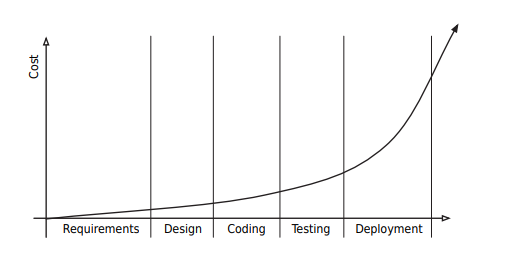

>**TIP**   
> 소프트웨어를 쓰면서 테스트만 하는 것이 아니라, 이후 TEST를 개발자 외 다른 사람들이 재구동할 수 있게 build한다
> * 이는 bug를 추적하는 번거로운 시간을 절약할 수 있다

doctest module(110p)을 사용해 문제사항의 예상 출력과 함수 호출에 의해 생성된 실제 출력을 비교해 bug를 잡을 예정

>**doctest**    
> * unittest, pytest처럼 test를 위한 모듈이다    
> * 간단하게 사용 예제를 test하는 정도의 목적으로 쓰임

In [9]:
def doubler(num):
    return num*2

In [12]:
import doctest

def doubler(num):
    """
    This function returns the argument 'num' multipled by 2

    Example
    -------
    >>> doubler(10)
    20
    """
    return num * 2

doctest.testmod()

TestResults(failed=0, attempted=1)

스크립트를 실행했을 때 아무런 출력이 없다면 doctest가 성공한것

In [13]:
import doctest

def doubler(num):
    """
    This function returns the argument 'num' multipled by 2

    Example
    -------
    >>> doubler(10)
    2000
    """
    return num * 2

doctest.testmod()

**********************************************************************
File "__main__", line 9, in __main__.doubler
Failed example:
    doubler(10)
Expected:
    2000
Got:
    20
**********************************************************************
1 items had failures:
   1 of   1 in __main__.doubler
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

이처럼 입력한 기대값과 실제 출력된 값을 비교해주어 간단하게 debugging이 가능

## 2. case study: testing above_freezing

In [5]:
def above_freezing(celsius: float) -> bool:
    """Return True iff temperature celsius degrees is above freezing.
    >>> above_freezing(5.2)
    True
    >>> above_freezing(-2)
    False
    """
    return celsius > 0


doctest를 사용해 docstring에서 예제 호출   
But test가 누락됐다.

> 온도가 0일 경우 어떻게 되는지 test해볼 것

#### 1) choosing test cases for above_freezing

* test code를 작성하기 전 사용할 test case를 결정해야 한다

> * freezing 함수는 각 test 사례에 대해 하나의 인수를 사용
> * freezing 함수는 두 가지 범주의 수가 있음
    + 하나는 freezing값 미만(False), 다른 하나는 freezing값 이상(True)
         * -16, -294.3, -56.97 또는 0 미만의 다른 값
         * 100.6, 29, 357.32 또는 0보다 큰 다른 숫자

test case의 범주가 누락되었나 확인   
- '>=' operator 대신 사용

In [6]:

def above_freezing_v2(celsius: float) -> bool:
    """Return True iff temperature celsius degrees is above freezing.
    >>> above_freezing_v2(5.2)
    True
    >>> above_freezing_v2(-2)
    False
    """
    return celsius >= 0


freezing 표시 값의 경우 두가지 함수 동작 사이의 경졔에 놓이므로 종종 **boundary cases**라고 한다
* boundary case는 다른 사례보다 bug를 포함할 가능성이 훨씬 높다
* 따라서 항상 버그가 무엇인지 파악하고 test할 가치가 있다

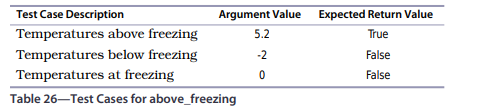

이제야 모든 범주를 다루게 됨~

In [8]:
above_freezing(0)

False

In [9]:
above_freezing_v2(0)

True

#### 2) Testing above_freezing Using unittest

doctest or unittest
1. 함수를 호출하고 결과를 직접 읽어 예상과 일치하는지 확인
2. doctest를 사용하여 docstring 기능 실행
    + 실제 값을 인간이 아닌 프로그램에 의해 비교하기 때문에 더 빠르고 오류가 덜 발생하기 쉽다

>**unit test**
> 프로그램의 단독된 요소 하나만을 가지고 exercise됨
> module을 통해 각 기능을 가진 function들을 독립적으로 test

따라서 doctest처럼 시스템 동작을 전체적으로 보지 않음! 독립적으로 봄!

새로운 클래스의 이름은 TestAboveFreezing이며 파일 test_oper_freezing.py에 저장   
* 클래스에는 각 테스트 사례마다 하나씩 세 가지 방법이 있음

In [1]:
import unittest
from ch15 import temperature

class TestAboveFreezing(unittest.TestCase):
    """Tests for temperature.above_freezing."""
    def test_above_freezing_above(self):
        """Test a temperature that is above freezing."""
        expected = True
        actual = temperature.above_freezing(5.2)
        self.assertEqual(expected, actual,
        "The temperature is above freezing.")
    def test_above_freezing_below(self):
        """Test a temperature that is below freezing."""
        expected = False
        actual = temperature.above_freezing(-2)
        self.assertEqual(expected, actual,
        "The temperature is below freezing.")
    def test_above_freezing_at_zero(self):
        """Test a temperature that is at freezing."""
        expected = False
        actual = temperature.above_freezing(0)
        self.assertEqual(expected, actual,
        "The temperature is at the freezing mark.")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


* test 당 한개의 dot으로 표현
    + 총 3개의 test 진행
* dot이 나타나면 성공적으로 test가 실행된 것이고, test 실행에 0.003s가 걸렸음을 의미

**assetEqual method**
* class unittest.TestCase의 method
* 기대치와 실제값이 동일한지 여부를 확인
* 만약 같지 않다면 3번째 인수로 들어간 오류메세지의 일부 표시

> **Warn**    
> unittest.main()은 test 이름의 모든 method를 실행시킨다

In [1]:
import unittest
from ch15 import temperature

class TestAboveFreezing(unittest.TestCase):
    """Tests for temperature.above_freezing."""
    def test_above_freezing_above(self):
        """Test a temperature that is above freezing."""
        expected = True
        actual = temperature.above_freezing_v2(5.2)
        self.assertEqual(expected, actual,
        "The temperature is above freezing.")
    def test_above_freezing_below(self):
        """Test a temperature that is below freezing."""
        expected = False
        actual = temperature.above_freezing_v2(-2)
        self.assertEqual(expected, actual,
        "The temperature is below freezing.")
    def test_above_freezing_at_zero(self):
        """Test a temperature that is at freezing."""
        expected = False
        actual = temperature.above_freezing_v2(0)
        self.assertEqual(expected, actual,
        "The temperature is at the freezing mark.")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.F.
FAIL: test_above_freezing_at_zero (__main__.TestAboveFreezing)
Test a temperature that is at freezing.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-b9c2e55364f9>", line 22, in test_above_freezing_at_zero
    self.assertEqual(expected, actual,
AssertionError: False != True : The temperature is at the freezing mark.

----------------------------------------------------------------------
Ran 3 tests in 0.003s

FAILED (failures=1)


F는 test가 실패했음을 의미
* test_above_freezing_at_zero에서 오류가 발생했음
* False!= True라는 표현은 agentEqual에 대한 호출에서 생성
    + variable expected는 False
    + variable active는 True 
* 세 번째 인수로 전달된 문자열은 오류 메시지로 출력: "The temperature is at the freezing mark"


**결론: freezing 함수에서 기대값과 실제값이 같다고 주장하는 것은 틀린 말이다**

doctest와 unittest 둘 중 unittest가 더많이 선호 되어진다:  
why?   
대형 test set의 경우 매우 긴 문서 문자열 대신 별도의 파일에 test 코드를 두는 것이 좋기 때문
1. Each test case can be in a separate method, so the tests are independent of each other.
    - doctest의 경우, 하나의 test에 의해 이뤄진 object 수정은 후속 test에도 적용되므로 각 test의 object가 독립적인지 주의를 더 많이 기울려야 한다

2. 각 test 사례가 별도의 방법으로 이뤄지므로 test 설명문을 작성할 수 있음

3. 오류메세지를 사용할 수 있음

## 3. case study2: testing running_sum

위의 test는 변수가 변하지 않는 programe에 시행됐다.    
따라서 이 part에서는 list와 dictionaries와 같이 mutable type을 다루는 function에 test해볼 거다

In [2]:
# sums.py
from typing import List
def running_sum(L: List[float]) -> None:
    """Modify L so that it contains the running sums of its original items.
    >>> L = [4, 0, 2, -5, 0]
    >>> running_sum(L)
    >>> L
    [4, 4, 6, 1, 1]
    """
    for i in range(len(L)):
        L[i] = L[i - 1] + L[i]

* test 구조가 이전과 다르다; return문이 없으므로 running_sum은 None을 반환

따라서 None이 반환되는 확인하는 test를 작성하는 것만으로는 함수 호출이 예상대로 작동하는 지 알 수 없음.    
**함수 호출이 예상대로 작동하는 지 알기 위한 단계;**   
1. Create a variable that refers to a list.
2. Call the function, passing that variable as an argument to it.
3. Check whether the list that the variable refers to was mutated correctly. 


#### 1) choosing test cases
* running_sum 함수에는 List[float]라는 하나의 매개 변수가 있다
* 리스트의 크기와 아이템의 값을 둘 다 결정해야 함
    - 크기에 대해서는 빈 리스트, 한 항목과 다른 항목이 있는 짧은 리스트(두 숫자가 상호작용하는 가장 짧은 경우), 여러 항목이 있는 긴 리스트로 test
    -  값은 음수, 양수 또는 0으로 test

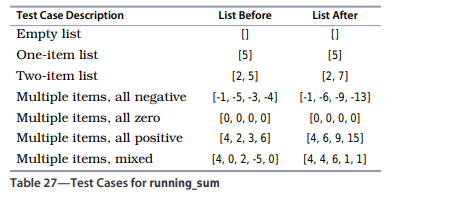

#### 2) testing running_sum using **Unittest**

In [1]:
import unittest
from ch15 import sums
class TestRunningSum(unittest.TestCase):
    """Tests for sums.running_sum."""
    def test_running_sum_empty(self):
        """Test an empty list."""
        argument = []
        expected = []
        sums.running_sum(argument)
        self.assertEqual(expected, argument, "The list is empty.")
    def test_running_sum_one_item(self):
        """Test a one-item list."""
        argument = [5]
        expected = [5]
        sums.running_sum(argument)
        self.assertEqual(expected, argument, "The list contains one item.")
    def test_running_sum_two_items(self):
        """Test a two-item list."""
        argument = [2, 5]
        expected = [2, 7]
        sums.running_sum(argument)
        self.assertEqual(expected, argument, "The list contains two items.")
    def test_running_sum_multi_negative(self):
        """Test a list of negative values."""
        argument = [-1, -5, -3, -4]
        expected = [-1, -6, -9, -13]
        sums.running_sum(argument)
        self.assertEqual(expected, argument,"The list contains only negative values.")
    def test_running_sum_multi_zeros(self):
        """Test a list of zeros."""
        argument = [0, 0, 0, 0]
        expected = [0, 0, 0, 0]
        sums.running_sum(argument)
        self.assertEqual(expected, argument, "The list contains only zeros.")
    def test_running_sum_multi_positive(self):
        """Test a list of positive values."""
        argument = [4, 2, 3, 6]
        expected = [4, 6, 9, 15]
        sums.running_sum(argument)
        self.assertEqual(expected, argument,"The list contains only positive values.")
    def test_running_sum_multi_mix(self):
        """Test a list containing mixture of negative values, zeros and
        positive values."""
        argument = [4, 0, 2, -5, 0]
        expected = [4, 4, 6, 1, 1]
        sums.running_sum(argument)
        self.assertEqual(expected, argument,"The list contains a mixture of negative values, zeros and"
        + "positive values.")
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..FF.FF
FAIL: test_running_sum_multi_negative (__main__.TestRunningSum)
Test a list of negative values.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-591f096bbcb0>", line 28, in test_running_sum_multi_negative
    self.assertEqual(expected, argument,"The list contains only negative values.")
AssertionError: Lists differ: [-1, -6, -9, -13] != [-5, -10, -13, -17]

First differing element 0:
-1
-5

- [-1, -6, -9, -13]
+ [-5, -10, -13, -17] : The list contains only negative values.

FAIL: test_running_sum_multi_positive (__main__.TestRunningSum)
Test a list of positive values.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-591f096bbcb0>", line 40, in test_running_sum_multi_positive
    self.assertEqual(expected, argument,"The list contains only positive values.")
AssertionError: Lists differ: [4, 6, 9, 15] != [10, 12, 15, 2

왜 이런 error가 났을까?
running_sum 함수 정의를 돌이켜보면, 0을 참조할때;
* L[0] = L[-1] + L[0]에 대해 L[-1]은 list 마지막 값이다
* 따라서 [4, 0, 2, -5, 0]는 마지막 요소가 0이기에 에러가 안뜬 예외이다

-> 문제해결을 위해, running_sum을 idx 0이 아닌 1에서 시작하도록 for문 조정하자

In [ ]:
from typing import List
def running_sum_v2(L: List[float]) -> None:
    """Modify L so that it contains the running sums of its original items.
    >>> L = [4, 0, 2, -5, 0]
    >>> running_sum(L)
    >>> L
    [4, 4, 6, 1, 1]
    """
    for i in range(1, len(L)):
        L[i] = L[i - 1] + L[i]

In [1]:
import unittest
from ch15 import sums2
class TestRunningSum(unittest.TestCase):
    """Tests for sums.running_sum."""
    def test_running_sum_empty(self):
        """Test an empty list."""
        argument = []
        expected = []
        sums2.running_sum(argument)
        self.assertEqual(expected, argument, "The list is empty.")
    def test_running_sum_one_item(self):
        """Test a one-item list."""
        argument = [5]
        expected = [5]
        sums2.running_sum(argument)
        self.assertEqual(expected, argument, "The list contains one item.")
    def test_running_sum_two_items(self):
        """Test a two-item list."""
        argument = [2, 5]
        expected = [2, 7]
        sums2.running_sum(argument)
        self.assertEqual(expected, argument, "The list contains two items.")
    def test_running_sum_multi_negative(self):
        """Test a list of negative values."""
        argument = [-1, -5, -3, -4]
        expected = [-1, -6, -9, -13]
        sums2.running_sum(argument)
        self.assertEqual(expected, argument,"The list contains only negative values.")
    def test_running_sum_multi_zeros(self):
        """Test a list of zeros."""
        argument = [0, 0, 0, 0]
        expected = [0, 0, 0, 0]
        sums2.running_sum(argument)
        self.assertEqual(expected, argument, "The list contains only zeros.")
    def test_running_sum_multi_positive(self):
        """Test a list of positive values."""
        argument = [4, 2, 3, 6]
        expected = [4, 6, 9, 15]
        sums2.running_sum(argument)
        self.assertEqual(expected, argument,"The list contains only positive values.")
    def test_running_sum_multi_mix(self):
        """Test a list containing mixture of negative values, zeros and
        positive values."""
        argument = [4, 0, 2, -5, 0]
        expected = [4, 4, 6, 1, 1]
        sums2.running_sum(argument)
        self.assertEqual(expected, argument,"The list contains a mixture of negative values, zeros and"
        + "positive values.")
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.......
----------------------------------------------------------------------
Ran 7 tests in 0.015s

OK


## 4. choosing test cases

debugging에서 test 범위가 올바른지가 중요하다

1. 크기에 대해 고려해야한다.
    - test에서 list, dictionary, file과 같은 컬렉션을 사용하는 경우 다음을 수행해야 한다;
        1. Test the empty collection
        2. Test a collection with one item in it
        3. Test a general case with several items
        4. Test the smallest interesting case, such as sorting a list containing two values
2. dichtomies(이분법)를 고려해야한다
    - 이분법의 예로는 빈/전체, 짝수/홀수, 양수/음수 및 알파벳/비알파벳이 있다
> 주의!; 함수가 둘 이상의 다른 범주 또는 상황을 처리하는 경우 모든 범주를 테스트해야 합니다.

3. boundaries에 대해 생각해야한다
    - 함수가 특정 경계 또는 분계점 주위에서 다르게 동작하는 경우 해당 경계 사례를 정확하게 테스트합니다.
    
4. order에 대해 생각해야 한다
    - 값이 서로 다른 순서로 나타날 때 함수가 다르게 작동할 경우 해당 순서를 식별하고 각 순서를 테스트합니다.
    - 정렬 예에서는 항목이 순서가 있는 test case와 그러지 않은 case가 필요함

## 5. hunting bugs
이 part에서는 debugging의 효율성을 높이고 원하는 작업을 수행할 수 있는 시간을 더 많이 제공하는 몇 가지 기술을 소개한다

>*wrong*    
>많은 초보자들이 진단 단계를 건너뛰고 무작정 상황을 바꿔 프로그램을 고치려고 하는 실수를 저지른다. 변수 이름을 변경하거나 두 함수가 정의된 순서를 스와핑하면 프로그램이 실제로 수정될 수 있지만, 이러한 변경은 수백만 건에 이를 수 있습니다. 특별한 순서 없이 연속적으로 시도하면 수시간, 수시간의 비효율적인 낭비가 될 수 있습니다.

문제의 원인을 추적하기 위한 규칙;
1. Make sure you know what the program is supposed to do. 
    - 
2. Repeat the failure
    - 오류가 발생한 경우에만 디버깅할 수 있으므로 프로그램이 안정적으로 실패하도록 하는 test case를 최대한 많이 찾아볼 것
3. Divide and conquer.
    - 무언가가 잘못되는 첫 번째 순간을 찾으려고 노력해야함
    -  문제가 처음 나타나는 기능 또는 코드 블록에 대한 입력을 조사합니다. 이러한 입력이 예상한 것과 다를 경우 해당 입력이 어떻게 생성되었는지 등을 확인
4. Change one thing at a time, for a reason
5. Keep records

# 6. bugs we've put in your ear


+ bug 조기 발견과 수정을 통한 전반적인 작업 감소
+ test case를 선택할 때  크기, 이분법, 경계 케이스 및 순서를 고려해야 한다.
+ 기능을 테스트하기 위해 subclasses of unittest’s TestCase class를 이용할 수 있습니다.
    - unittest 장점에는 시험 코드와 시험 코드를 분리하여 유지하고, 시험을 서로 독립적으로 유지할 수 있으며, 각각의 개별 시험 사례를 문서화할 수 있는 능력이 포함된다.
+ 소프트웨어를 디버그하려면 소프트웨어를 어떻게 해야 하는지 알고 있어야 하며 오류를 반복할 수 있어야 한다. 프로그램을 실패하게 하는 조건을 단순화하는 것은 가능한 원인들의 범위를 좁히는 효과적인 방법이다.